In [288]:
import json
import requests
import time
import datetime
from pprint import pprint

In [326]:
# US flu data

def covid19_data():
    data = []
    response = requests.get("https://services1.arcgis.com/0MSEUqKaxRlEPj5g/arcgis/rest/services/ncov_cases/FeatureServer/1/query?where=OBJECTID%3E0&objectIds=&time=&geometry=&geometryType=esriGeometryEnvelope&inSR=&spatialRel=esriSpatialRelIntersects&resultType=none&distance=0.0&units=esriSRUnit_Meter&returnGeodetic=false&outFields=Deaths%2C+Country_Region%2C+Last_Update&returnGeometry=false&featureEncoding=esriDefault&multipatchOption=xyFootprint&maxAllowableOffset=&geometryPrecision=&outSR=&datumTransformation=&applyVCSProjection=false&returnIdsOnly=false&returnUniqueIdsOnly=false&returnCountOnly=false&returnExtentOnly=false&returnQueryGeometry=false&returnDistinctValues=false&cacheHint=false&orderByFields=&groupByFieldsForStatistics=&outStatistics=&having=&resultOffset=&resultRecordCount=&returnZ=false&returnM=false&returnExceededLimitFeatures=true&quantizationParameters=&sqlFormat=none&f=pjson&token=")
    response = json.loads(response.text)
    
    for f in response["features"]:
        if f["attributes"]["Country_Region"] == "US":
            year = None
            week = None
            try:
                d = int(f["attributes"]["Last_Update"]) / 1000
                thedatetime = datetime.datetime.utcfromtimestamp(d)
                year = datetime.datetime.utcfromtimestamp(d).year
                week = datetime.datetime.utcfromtimestamp(d).isocalendar()[1]
            except:
                pass
            item = {
#                 "last_update" : f["attributes"]["Last_Update"],
                "deaths" : f["attributes"]["Deaths"],
                "year":year,
                "week":week,
                "datetime":thedatetime,
                "timestamp":d
            }
            data.append(item)
    return data

def flu_historical_data():
    data = []

    flu_historical_data = requests.get("https://www.cdc.gov/flu/weekly/weeklyarchives2018-2019/data/NCHSData09.csv")
    flu_historical_data = flu_historical_data.text
    flu_historical_data = flu_historical_data.split('\n')

    for i, row in enumerate(flu_historical_data):
        if row != '\n' and i > 0:
            try:
                columns = row.split(",")
                week = int(columns[1])
                year = columns[0]
                if week < 9:
                    yearweek = year + "0" + str(week)
                else:
                    yearweek = year + str(week)
                item = {
                    "year":columns[0],
                    "week":week,
                    "yearweek": int(yearweek),
                    "percent_all_deaths":columns[2],
                    "expected":columns[3],
                    "threshold":columns[4],
                    "all_deaths":int(columns[5]),
                    "pneumonia_deaths":int(columns[6]),
                    "influenza_deaths":int(columns[7].strip("\r"))

                }
            except IndexError:
                pass
            data.append(item)
    return data

def covid19_clean_data():
    data = []
    deaths = 0
    with open("data/usa_county_wise.csv", 'r', newline='') as csvfile:
        spamreader = csv.DictReader(csvfile, dialect='excel')
        for row in spamreader:
            thedate = row['Date'].strip()
            try:
                thedate = datetime.datetime.strptime(row['Date'], '%m/%d/%y')
            except:
#                 thedate = datetime.datetime.strptime("1/1/2001", '%m/%d/%y')
                pass
            item = {
#                     "year":thedate.year,
                    "all_deaths":int(row['Deaths']),
                }
            pprint(item)
            data.append(item)
    return data
            
covid19_clean_data()



{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 1}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 1}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 1}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 3}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 1}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 56}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 1}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 6}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_dea

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 1}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 1}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 1}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 1}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 4}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 1}
{'all_deaths': 0}
{'all_deaths': 1}
{'all_deaths': 0}
{'all_deaths': 2}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 1}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 3}
{'all_deaths': 13}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_dea

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 4}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 1}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 1}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 1}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 1}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 1}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 1}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 2}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 1}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 6}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 1}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 1}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 1}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 1}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 1}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 3}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 6}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 3}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 2}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 1}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 1}
{'all_deaths': 1}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 4}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 1}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 1}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 4}
{'all_deaths': 0}
{'all_deaths': 3}
{'all_deaths': 1}
{'all_deaths': 1}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 1}
{'all_deaths': 1}
{'all_deaths': 1}
{'all_deaths': 2}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 1}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 10}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 1}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 6}
{'all_deaths': 0}
{'all_deaths': 1}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 4}
{'all_deaths': 0}
{'all_dea

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 2}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 1}
{'all_deaths': 0}
{'all_deaths': 1}
{'all_deaths': 0}
{'all_deaths': 1}
{'all_deaths': 1}
{'all_deaths': 1}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 1}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 1}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 1}
{'all_deaths': 2}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 2}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 1}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 1}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 1}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 1}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 2}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 1}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 1}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 1}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 1}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 1}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 1}
{'all_deaths': 0}
{'all_deaths': 1}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 1}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 1}
{'all_deaths': 0}
{'all_deaths': 1}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 1}
{'all_deaths': 0}
{'all_deaths': 1}
{'all_deaths': 6}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 1}
{'all_deaths': 0}
{'all_deaths': 2}
{'all_deaths': 2}
{'all_deaths': 3}
{'all_deaths': 2}
{'all_deaths': 0}
{'all_deaths': 6}
{'all_deaths': 2}
{'all_deaths': 4}
{'all_deaths': 0}
{'all_deaths': 8}
{'all_deaths': 0}
{'all_deaths': 10}
{'all_deaths': 0}
{'all_deaths': 5}
{'all_deaths': 5}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_dea

{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 1}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 1}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 2}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 1}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 1}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 1}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deaths': 0}
{'all_deat

[{'all_deaths': 0},
 {'all_deaths': 0},
 {'all_deaths': 0},
 {'all_deaths': 0},
 {'all_deaths': 0},
 {'all_deaths': 0},
 {'all_deaths': 0},
 {'all_deaths': 0},
 {'all_deaths': 0},
 {'all_deaths': 0},
 {'all_deaths': 0},
 {'all_deaths': 0},
 {'all_deaths': 0},
 {'all_deaths': 0},
 {'all_deaths': 0},
 {'all_deaths': 0},
 {'all_deaths': 0},
 {'all_deaths': 0},
 {'all_deaths': 0},
 {'all_deaths': 0},
 {'all_deaths': 0},
 {'all_deaths': 0},
 {'all_deaths': 0},
 {'all_deaths': 0},
 {'all_deaths': 0},
 {'all_deaths': 0},
 {'all_deaths': 0},
 {'all_deaths': 0},
 {'all_deaths': 0},
 {'all_deaths': 0},
 {'all_deaths': 0},
 {'all_deaths': 0},
 {'all_deaths': 0},
 {'all_deaths': 0},
 {'all_deaths': 0},
 {'all_deaths': 0},
 {'all_deaths': 0},
 {'all_deaths': 0},
 {'all_deaths': 0},
 {'all_deaths': 0},
 {'all_deaths': 0},
 {'all_deaths': 0},
 {'all_deaths': 0},
 {'all_deaths': 0},
 {'all_deaths': 0},
 {'all_deaths': 0},
 {'all_deaths': 0},
 {'all_deaths': 0},
 {'all_deaths': 0},
 {'all_deaths': 0},


In [298]:
flu_data = flu_historical_data()
covid_data = covid19_data()

print("flu_data:", flu_data)
print("covid_data:", covid_data)




flu_data: [{'year': '2009', 'week': 40, 'yearweek': 200940, 'percent_all_deaths': '7.8277169697', 'expected': '7.23411', 'threshold': '7.50529', 'all_deaths': 46412, 'pneumonia_deaths': 3484, 'influenza_deaths': 149}, {'year': '2009', 'week': 41, 'yearweek': 200941, 'percent_all_deaths': '8.3460702215', 'expected': '7.32283', 'threshold': '7.59398', 'all_deaths': 46453, 'pneumonia_deaths': 3703, 'influenza_deaths': 174}, {'year': '2009', 'week': 42, 'yearweek': 200942, 'percent_all_deaths': '8.5983435544', 'expected': '7.41794', 'threshold': '7.68906', 'all_deaths': 47451, 'pneumonia_deaths': 3841, 'influenza_deaths': 239}, {'year': '2009', 'week': 43, 'yearweek': 200943, 'percent_all_deaths': '8.7375086147', 'expected': '7.51805', 'threshold': '7.78913', 'all_deaths': 46432, 'pneumonia_deaths': 3762, 'influenza_deaths': 295}, {'year': '2009', 'week': 44, 'yearweek': 200944, 'percent_all_deaths': '8.7731149202', 'expected': '7.62168', 'threshold': '7.89273', 'all_deaths': 47372, 'pneum

3484
3703
3841
3762
3858
3929
3721
3655
3779
3982
3985
3838
4310
4428
4471
4314
4072
4085
4128
4236
4291
4342
4377
4236
4081
3986
3983
3730
3569
3605
3530
3464
3413
3251
3250
3304
3173
3143
3141
3215
3115
3093
2956
3029
2928
3010
2894
3048
3168
3189
3100
3215
3258
3456
3423
3497
3501
3605
3540
3606
3854
3826
4024
4093
4565
4766
4700
4702
4801
4692
4744
4961
4982
4807
4723
4487
4326
4182
4054
3958
3891
3692
3745
3735
3575
3543
3493
3457
3333
3328
3346
3189
3146
3184
2990
3002
3024
2980
3061
3068
3000
3036
3200
3162
3257
3402
3317
3381
3494
3662
3636
3546
3642
3741
3849
3828
3970
4323
4245
4261
4227
4026
4024
4129
4191
4234
4346
4288
4060
3796
3829
3758
3690
3573
3527
3330
3329
3290
3138
3068
3153
3147
3159
3004
3033
3011
2889
3039
3040
3018
2964
3017
3109
3160
3120
3217
3210
3315
3382
3376
3349
3434
3495
3430
3807
3940
3959
4208
4705
5599
6065
5938
5646
5284
5020
4885
4580
4485
4417
4403
4184
4179
4051
3937
3826
3585
3504
3393
3313
3248
3040
3342
3271
3123
3055
2976
3035
3041
2866
2929


<IPython.core.display.Javascript object>


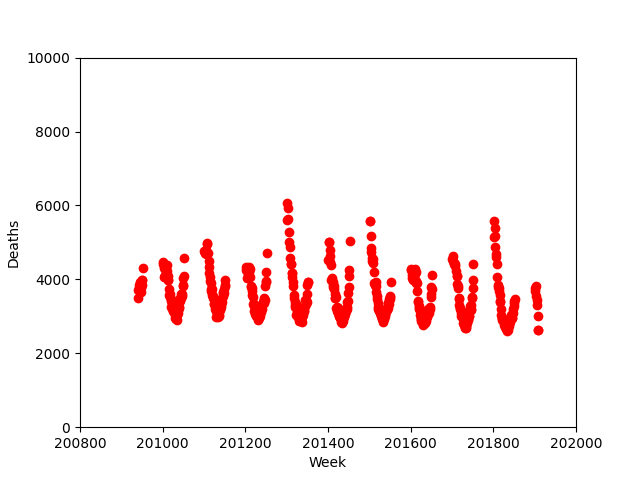

Text(0, 0.5, 'Deaths')

In [283]:
from matplotlib import pyplot as plt
import numpy as np
import math
%matplotlib notebook

flu_data = flu_historical_data()
covid_data = covid19_data()

flu_deaths = []
flu_weeks = []
flu_yearweek = []
for f in flu_data:
#     if f["year"] == "2015" or f["year"] == "2016":
    print(f["pneumonia_deaths"])
    flu_deaths.append(f["pneumonia_deaths"])
    flu_weeks.append(f["week"])
    flu_yearweek.append(f["yearweek"])

# print(flu_deaths)
# print(flu_weeks)
# print(flu_yearweek)

# data = {'a': np.arange(50),
#         'c': np.random.randint(0, 50, 50),
#         'd': np.random.randn(50)}
# data['b'] = data['a'] + 10 * np.random.randn(50)
# data['d'] = np.abs(data['d']) * 100

# plt.scatter('deaths','week', c='c', s='d', data=flu_data)
plt.plot(flu_yearweek, flu_deaths, 'ro')
plt.axis([200800, 202000, 0, 10000])
plt.xlabel('Week')
plt.ylabel('Deaths')

# x=np.arange(0,math.pi*2, 0.05)
# y=np.sin(x)
# fig=plt.figure()
# ax=fig.add_axes([0,0,1,1])
# ax.plot(x,y)
# ax.set_title("sine wave")
# ax.set_xlabel("angle")
# ax.set_ylabel("sine")